I'm interested in a wide variety of problems involving modeling, strategy, and simulation.  I'd heard that it takes seven shuffles to randomize a deck of cards, and I finally came across the article that is the source of this urban legend - Bayer and Diaconis (1992).  For an excellent discussion of the problem, see <A HREF="http://www.flatrock.org.nz/topics/art_of_playing_cards/how_to_win_at_poker.htm">How to Win at Poker, and Other Science Lessons</A>.

As you might expect, the measurement of randomness is key.  Trefethen and Trefethen (2000) used a different measurement and determined that at six shuffles, the information content of deck reaches a value near its minimum.  Also importantly, Bayer and Diaconis argue that the deck remains essentially ordered until the fourth shuffle, when randomness increases sharply.  Trefethen and Trefethen argue that by the information content definition, the randomness increases from the first shuffle, and continues more or less linearly until the fifth shuffle.

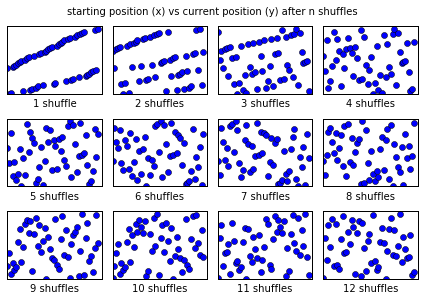

In [2]:
from riffle import riffle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

n_shuffles = 12
    
deck = np.arange(52)

for i in range(1,n_shuffles+1):
    riffle(deck)
    plt.subplot(3,4,i)
    plt.plot(np.arange(52),deck,'o')
    plt.xticks([])
    plt.yticks([])
    if i==1:
        plt.xlabel('1 shuffle')
    else:
        plt.xlabel('{} shuffles'.format((i)))  
    plt.xlim(0,53)
    plt.ylim(0,53)
plt.suptitle('starting position (x) vs current position (y) after n shuffles', y=1.03)
plt.tight_layout()

plt.savefig('fig1.png',dpi=600,bbox_inches='tight')

# Figure 1: Starting position vs. ending position for a single deck of cards shuffled up to 16 times.	

Figure 1 is a single run of shuffling a deck twelve times, where the x-axis is the starting position, and the y-axis is the ending position.  At zero shuffles, starting position = ending position.  As the shuffling process continues, the starting position and ending positions should be increasingly unstructured.  At three shuffles, the deck <i>looks</i> pretty random, although you can still see a few isolated "rising sequences" - places at which you're likely to see a run of sequential cards.  At n=5, the deck appears about as random as it's going to get.

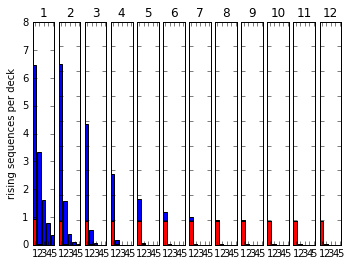

In [6]:
import numpy as np
from riffle import riffle, count_rises
import matplotlib.pyplot as plt

deck_size = 52
n_shuffles = 12
k = 1000

results = np.zeros((n_shuffles,deck_size+1))
for j  in range(n_shuffles):
    for i in range(k):
        deck = np.arange(deck_size)
        riffle(deck,j+1)
        rises = count_rises(deck)
        if np.shape(rises)[0] > 0:
            results[j,rises[:,0]] = results[j,rises[:,0]] + rises[:,1]
results = results/k

random_results = np.zeros((n_shuffles,deck_size+1))
for j  in range(n_shuffles):
    for i in range(k):
        deck = np.arange(deck_size)
        np.random.shuffle(deck)
        rises = count_rises(deck)
        if np.shape(rises)[0] > 0:
            random_results[j,rises[:,0]] = random_results[j,rises[:,0]] + rises[:,1]
random_results = random_results /k

nshow = 6
for i in range(n_shuffles): 
    plt.subplot(1,n_shuffles+1,i+1)
    plt.bar(np.arange(1,nshow),results[i,1:nshow])
    plt.ylim((0,1.1*np.max(results)))
    plt.xticks(np.arange(.5,6.5,1),range(0,6))
    plt.bar(np.arange(1,nshow)  ,random_results[0,1:nshow],color='red')
    plt.title(str(i+1))
    if i==0:
        plt.ylabel('rising sequences per deck')
    if i>0:
        locs,labels = plt.yticks()
        plt.yticks(locs,[])

plt.savefig('fig2.png',dpi=600)
    
# Figure 2: Probability distributions of "rising sequences" in a shuffled deck (blue) vs. a randomized deck (red). Blue has far
# rising sequences than one would expect through about 7 shuffles.

But that's not the whole story.  Figure 2 shows the distribution of these rising sequences (blue) in comparison to one drawn from a true randomization (red).  The distribution of blue doesn't approach the distribution of red until about 8 or 9 shuffles.  Before that, you'll find more rising sequences in the deck than you'd expect. 

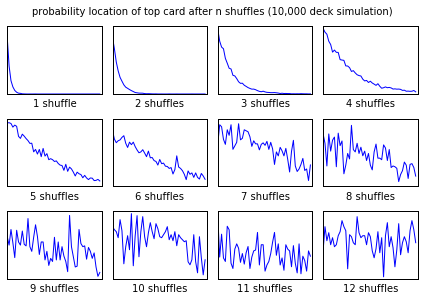

In [7]:
n_shuffles = 12
n_decks = 10000
top_card = 255*np.ones((n_decks,n_shuffles),dtype=np.uint8)

# Shuffle each deck, and locate where the top card went.  Store that result
# in an array.

for i in range(n_decks):
    deck = np.arange(52)
    for j in range(n_shuffles):
        riffle(deck)
        top_card[i,j] = np.where(deck==0)[0][0]

for i in range(n_shuffles):
    plt.subplot(3,4,i+1)
    hist, bin_edges = np.histogram(top_card[:,i],bins=np.arange(0.5,51.5,1),density=True)
    plt.plot(hist)
    plt.xticks([])
    plt.yticks([])
    if i==0:
        plt.xlabel('1 shuffle')
    else:
        plt.xlabel('{} shuffles'.format((i+1)))  
        
plt.tight_layout()
plt.suptitle('probability location of top card after n shuffles (10,000 deck simulation)',y=1.03)
plt.savefig('fig3.png',dpi=600,bbox_inches='tight')
        
# Figure 3 below:

<P>Figure 3 shows the results of tracking where the card that started on top ended up.  At n=1 shuffles, there's roughly a 50% chance that the new top card is the original top card.  When the deck is truly random, it should be equally likely that the original top card is at any position in the deck (1/52 chance of being anywhere, or about 1.923%).  The probability distribution is certainly in that range at n=5 (varying from about 1% to 4%), but is still obviously oriented towards the top of the deck.  Only at <B>thirteen</B> shuffles does the p value for a correlation between the original order and the distribution go above 0.05) (n=12 was p=.02, by the way).  Statistical tests aside, the remaining order is pretty easy to pick out visually up to this point by the slope of the line.  (Note the extent of the y-axis changes as you progress through the shuffle to highlight the remaining structure!) These results were based on a simulation of 1 million decks.
<P>So, as you might expect, the number of shuffles to randomness depends on your definition of randomness.  If I were betting on the top card, my chances of winning (though small for n>4) are better than average all the way up until the twelfth or thirteenth shuffle!

<B>References</B>
<p>Bayer, D., & Diaconis, P. (1992). <a href="http://statweb.stanford.edu/~cgates/PERSI/papers/bayer92.pdf">Trailing the dovetail shuffle to its lair</a>. <I>The Annals of Applied Probability</I>, 2(2), 294-313.
<p>Gilbert. (1995). Theory of shuffling (Technical memorandum): Bell Laboratories.
<p>Trefethen, L. N., & Trefethen, L. M. (2000). How many shuffles to randomize a deck of cards? <I>Proceedings of the Royal Society of London: A</I>, 456(2002), 2561-2568.